PROJECT

Topic : PhiUSIIL Phishing URL
PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.

Dataset link : https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

Steps in Data Preprocessing

Step 1: Import the necessary libraries

In [1]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

Step 2: Load the dataset

In [2]:
# Load Dataset 
df_url=pd.read_csv('E:/DataScience/Project/phiusiil+phishing+url+dataset/PhiUSIIL_Phishing_URL_Dataset.csv')
df_url.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [3]:
#Shape of dataframe

df_url.shape

(235795, 56)

In [4]:
#Listing the features of the dataset

df_url.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [5]:
# Check the data info

df_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [6]:
# nunique value in columns

df_url.nunique()

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
L

In [7]:
# Drop the column 'FILENAME' since it's not important
df_url=df_url.drop(columns=['FILENAME'])
df_url.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


Checking for null values 

In [8]:
# Checking for Missing Values Using isnull().sum()
df_url.isnull().sum().any()

False

Observation : There are no missing or null values present in dataset.

Checking for duplicated data 

In [9]:
# Checking for Missing Values Using duplicated().sum()
df_url.duplicated().sum()

0

Observation : There is no duplicate records in the dataset.

Handling Categoral Data

In [10]:
# Extract Categoral and Numerical features 
cat_features=df_url.select_dtypes(include='object').columns.tolist()
num_features=df_url.select_dtypes(exclude='object').columns

#dataset=df_url.copy()
label_=LabelEncoder()
for i in cat_features: 
    df_url[i]=label_.fit_transform(df_url[i])

In [11]:
df_url.describe()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,117580.908874,34.573095,105081.846727,21.470396,0.002706,319.494234,78.430778,0.845508,0.260423,0.055747,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,67947.268071,41.314153,65060.811667,9.150793,0.051946,144.660289,28.976055,0.216632,0.251628,0.010587,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,0.000000,13.000000,0.000000,4.000000,0.000000,0.000000,0.155574,0.000000,0.000000,0.001083,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58783.500000,23.000000,45036.500000,16.000000,0.000000,231.000000,57.024793,0.680000,0.005977,0.050747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,117481.000000,27.000000,103422.000000,20.000000,0.000000,231.000000,100.000000,1.000000,0.079963,0.057970,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,176427.500000,34.000000,161790.500000,24.000000,0.000000,443.000000,100.000000,1.000000,0.522907,0.062875,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,235369.000000,6097.000000,220085.000000,110.000000,1.000000,694.000000,100.000000,1.000000,0.522907,0.090824,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [12]:
df_url.shape

(235795, 55)

Observation : 

1. There are 235795 instances and 55 fearures in dataset.
2. Out of which 54 are independent features where as 1 is dependent feature.
3. Among these 54 features 4 are of object datatype(Categoral Features), so we use LabelEncoder to encode them.
4. There is no missing/ null/ duplicate values in dataset.

Check Data is Balanced

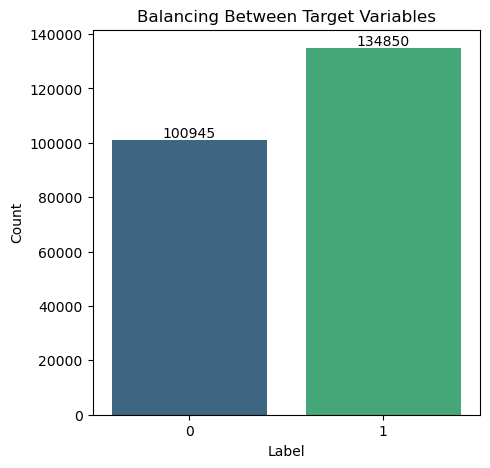

In [13]:
target_col=['label']
XX=df_url[target_col[0]].value_counts().reset_index()
plt.figure(figsize=(5,5))
ax=sns.barplot(data=XX,x=XX['label'],y=XX['count'],palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Balancing Between Target Variables")
plt.show()

In [14]:
# Calculate the skewness and kurtosis

print("Skewness of label :",df_url['label'].skew())
print("Kurtosis of label :",df_url['label'].kurt())

Skewness of label : -0.2906020207369369
Kurtosis of label : -1.915566713345261


Observation : 

From above figure, the data seems pretty much balanced. Skewness is between -0.5 and 0.5 i.e; Approximately symmetric and Kurtosis is less than 3 i.e; Platykurtic (flatter peak, lighter tails). Hence we can conclude that there is no significant difference between the count of the target variable values.

 Visualizing the data

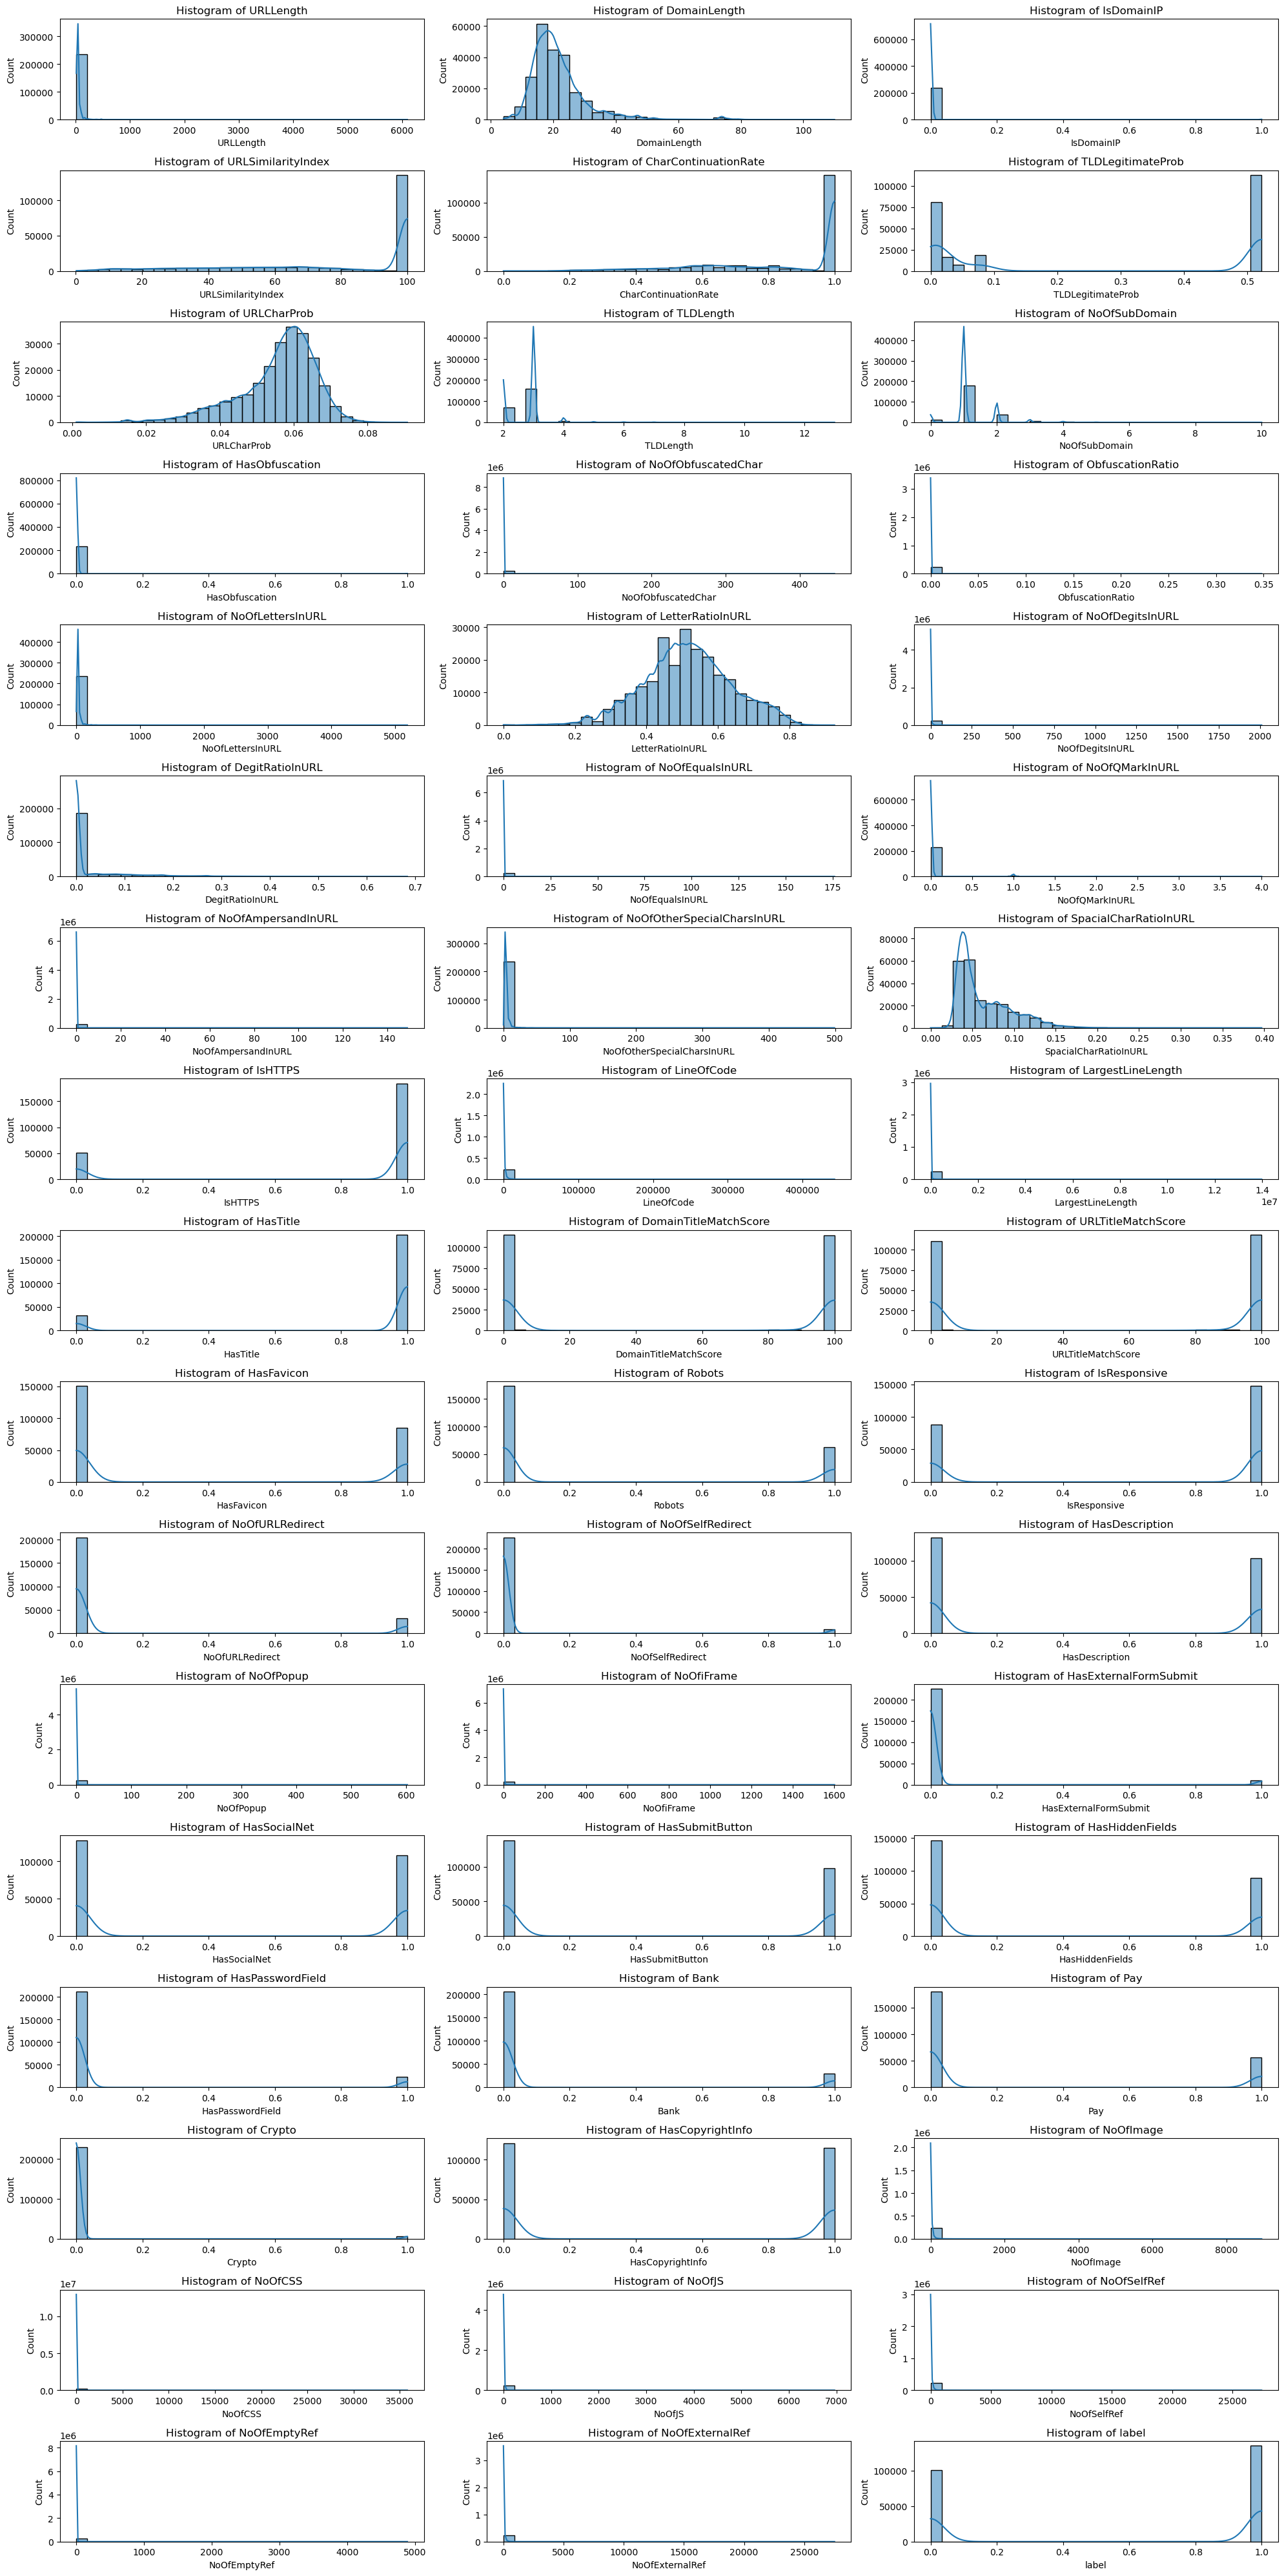

In [15]:
# 1. Histograms for numerical features

plt.figure(figsize=(20,40))
for i, col in enumerate(num_features):
    plt.subplot(17,3, i + 1)
    sns.histplot(df_url[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

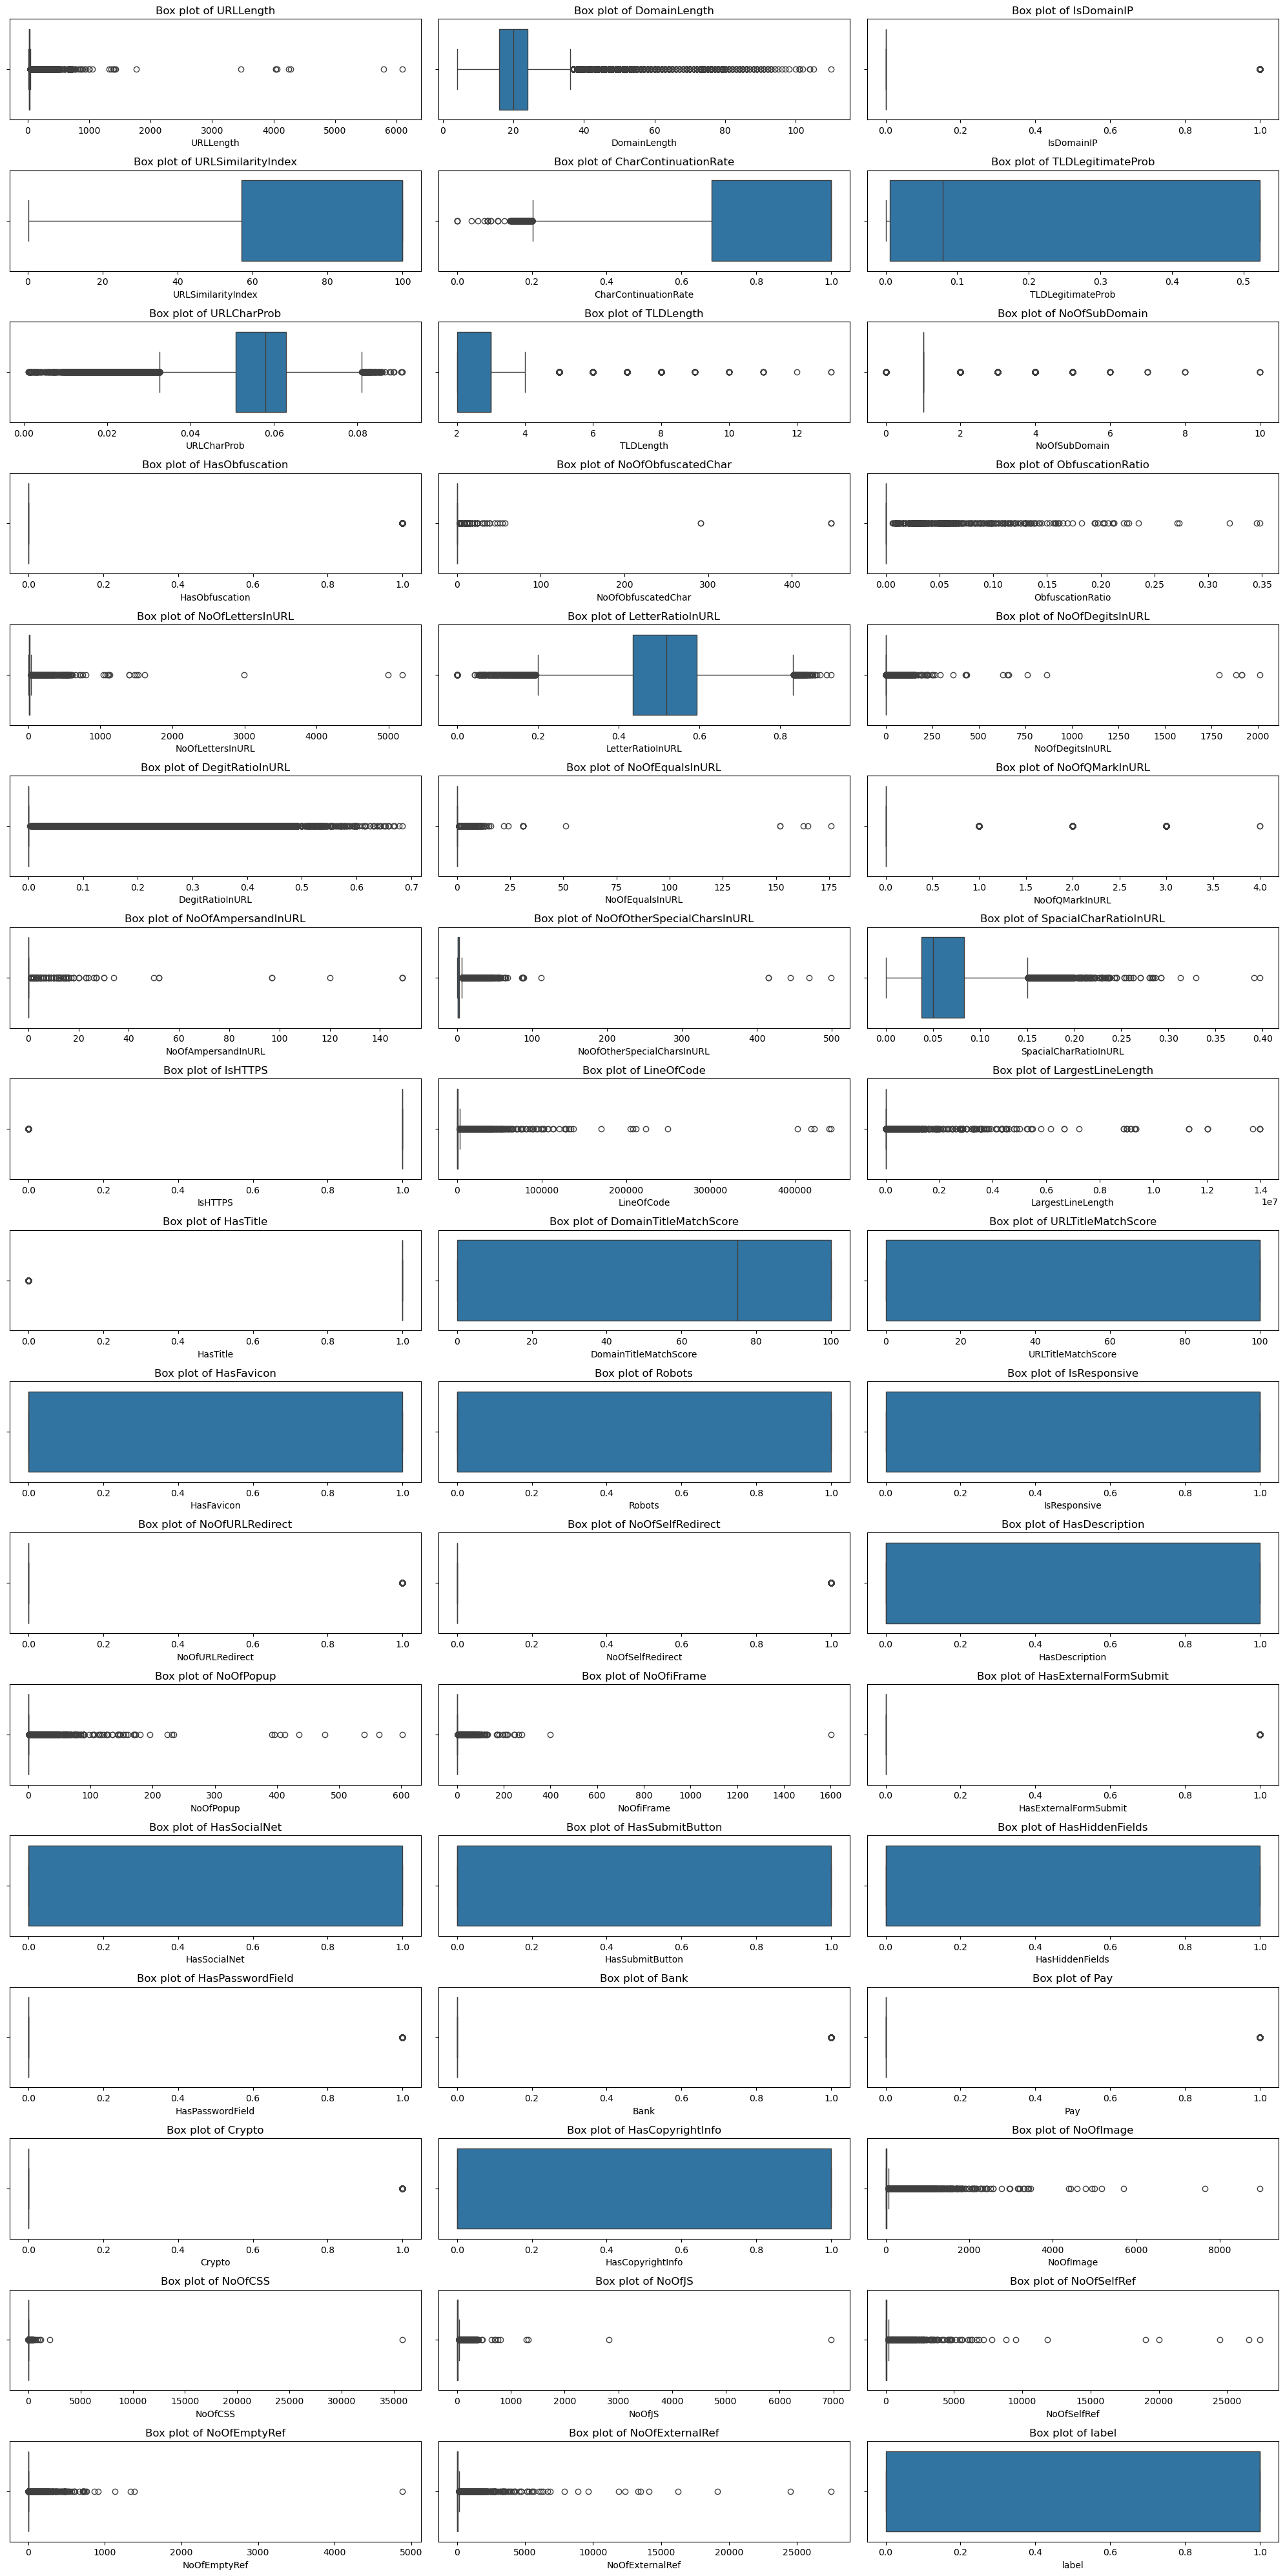

In [16]:
# 2. Box plots for numerical features

plt.figure(figsize=(20,40))
for i, col in enumerate(num_features):
    plt.subplot(17, 3, i + 1)
    sns.boxplot(x=df_url[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

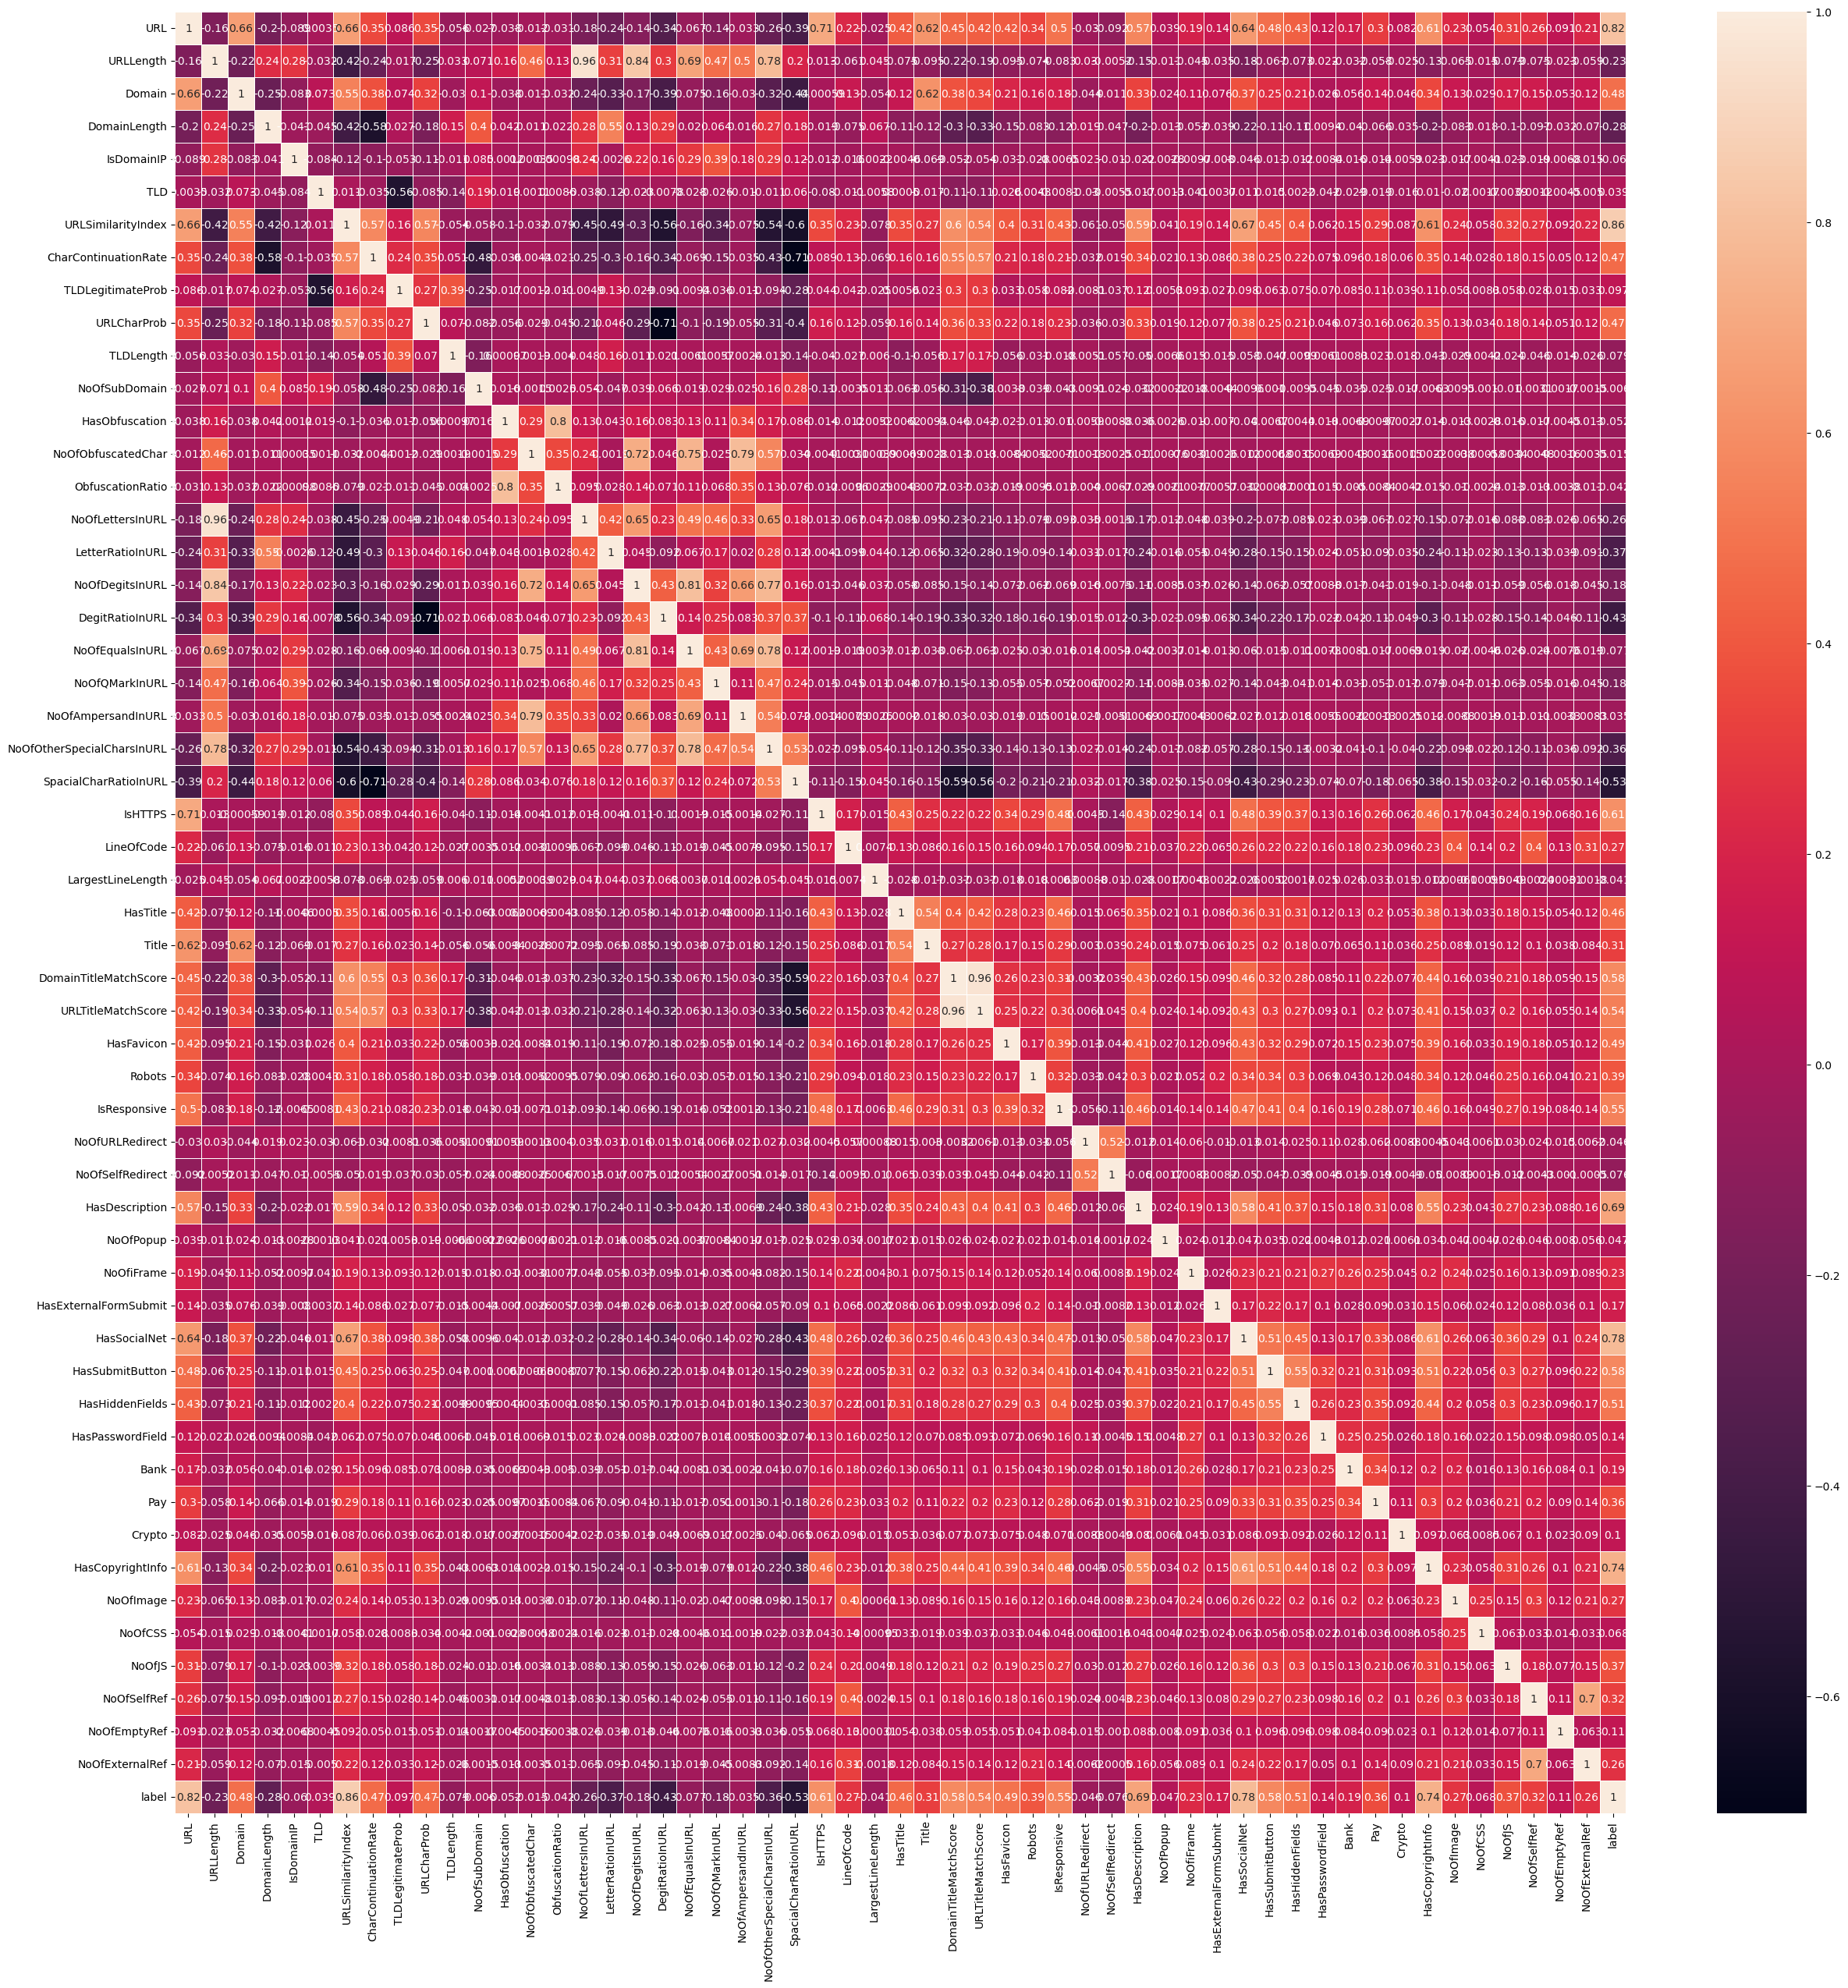

In [17]:
# 3. Correlation heatmap

plt.figure(figsize=(30,30))
sns.heatmap(df_url.corr(),linewidths=0.5,annot=True)
plt.show()

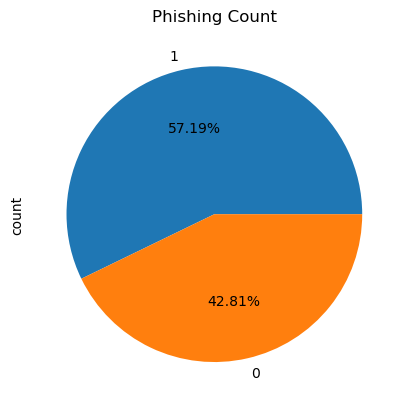

In [18]:
# 4. Phishing Count in pie chart

df_url['label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

Handling Outliers 

In [19]:
# Replace outliers with median() values.

dataset=df_url.copy()
for i in dataset.columns: 
    q1=dataset[i].quantile(0.25)
    q3=dataset[i].quantile(0.75)
    iqr=q3-q1
    median = dataset.loc[(dataset[i]>(q1-1.5*iqr))&(dataset[i]<(q3+1.5*iqr)),i].median()
    dataset.loc[(dataset[i]<(q1-1.5*iqr))|(dataset[i]>(q3+1.5*iqr)),i]=np.nan
    dataset.fillna(median,inplace=True)

dataset.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,209013.0,31.0,187114.0,24.0,0.0,231.0,100.0,1.000000,0.522907,0.061933,...,0.0,0.0,1.0,34.0,20.0,28.0,119.0,0.0,124.0,1.0
1,223747.0,23.0,204805.0,16.0,0.0,254.0,100.0,0.666667,0.032650,0.050207,...,0.0,0.0,1.0,50.0,9.0,8.0,39.0,0.0,5.0,1.0
2,227579.0,29.0,209611.0,22.0,0.0,647.0,100.0,0.866667,0.028555,0.064129,...,0.0,0.0,1.0,10.0,2.0,7.0,42.0,2.0,5.0,1.0
3,205082.0,26.0,182115.0,19.0,0.0,231.0,100.0,1.000000,0.522907,0.057606,...,0.0,0.0,1.0,3.0,2.0,15.0,22.0,1.0,31.0,1.0
4,198761.0,33.0,173664.0,26.0,0.0,503.0,100.0,1.000000,0.079963,0.059441,...,0.0,0.0,1.0,5.0,15.0,34.0,72.0,1.0,85.0,1.0


Splitting the Data

In [48]:
# Splitting the dataset into dependant and independant fetature

X=dataset.drop(["label"],axis=1)
Y=dataset["label"]

# Splitting the dataset into train and test sets: 80-20 split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((188636, 54), (188636,), (47159, 54), (47159,))

Standardize Data

In [44]:
# Standardize data with StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [45]:
dataset.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,209013.0,31.0,187114.0,24.0,0.0,231.0,100.0,1.000000,0.522907,0.061933,...,0.0,0.0,1.0,34.0,20.0,28.0,119.0,0.0,124.0,1.0
1,223747.0,23.0,204805.0,16.0,0.0,254.0,100.0,0.666667,0.032650,0.050207,...,0.0,0.0,1.0,50.0,9.0,8.0,39.0,0.0,5.0,1.0
2,227579.0,29.0,209611.0,22.0,0.0,647.0,100.0,0.866667,0.028555,0.064129,...,0.0,0.0,1.0,10.0,2.0,7.0,42.0,2.0,5.0,1.0
3,205082.0,26.0,182115.0,19.0,0.0,231.0,100.0,1.000000,0.522907,0.057606,...,0.0,0.0,1.0,3.0,2.0,15.0,22.0,1.0,31.0,1.0
4,198761.0,33.0,173664.0,26.0,0.0,503.0,100.0,1.000000,0.079963,0.059441,...,0.0,0.0,1.0,5.0,15.0,34.0,72.0,1.0,85.0,1.0
